In [8]:
import importlib
import itertools
import numpy as np

import visualizers
from geometric_types import Point
import kd_tree as kd_tree_module
# from kd_tree import KDTree
importlib.reload(visualizers)
importlib.reload(kd_tree_module)

def conv_to_np_float64_points(points: list[list]) -> list[Point]:
    new_points = []
    for p in points:
        new_points.append(list(map(np.float64, p)))

    return new_points

<IPython.core.display.Javascript object>


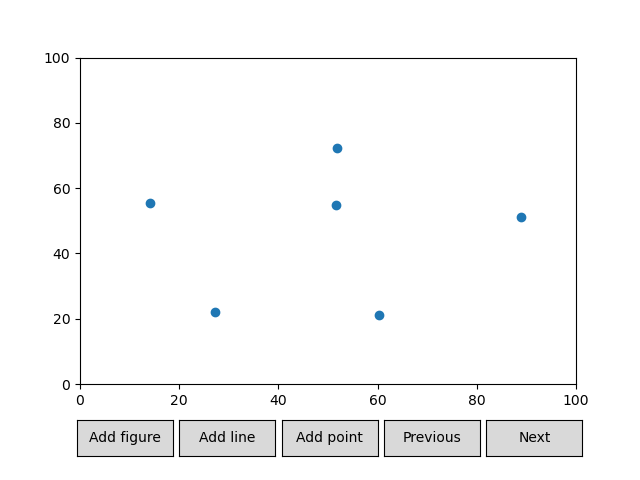

(0.0, 100.0)

In [9]:

%matplotlib notebook

input_plot = visualizers.Plot()
input_plot.draw()
ax = visualizers.plt.gca()
ax.set_xlim((0, 100))
ax.set_ylim((0, 100))

### Reset input points

In [10]:
inp_points = []

### Get input points from plot above

In [11]:
inp_points = [*inp_points, *itertools.chain(*map(lambda coll: coll.points, input_plot.get_added_points()))]

### Build kd-tree

<IPython.core.display.Javascript object>


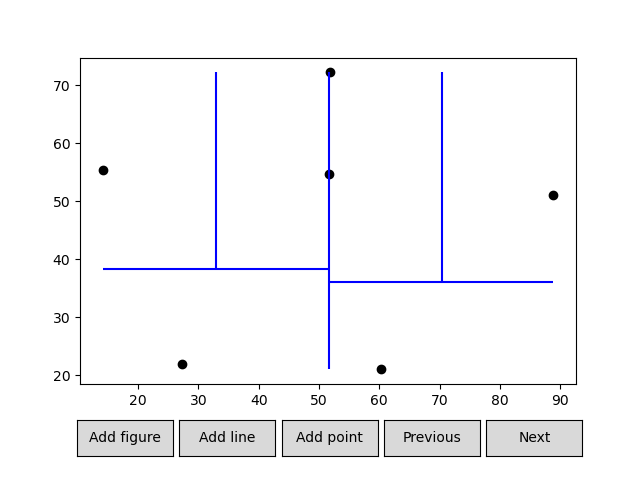

In [12]:
kd_tree = kd_tree_module.KDTree(2, conv_to_np_float64_points(inp_points), True)
kd_vis = kd_tree.visualizer

tree_build_plot = kd_vis.get_tree_building_plot()
tree_build_plot.draw()


[[21.55367943548387, 20.728017769607835], [44.53755040322581, 9.392233455882344]]


<IPython.core.display.Javascript object>


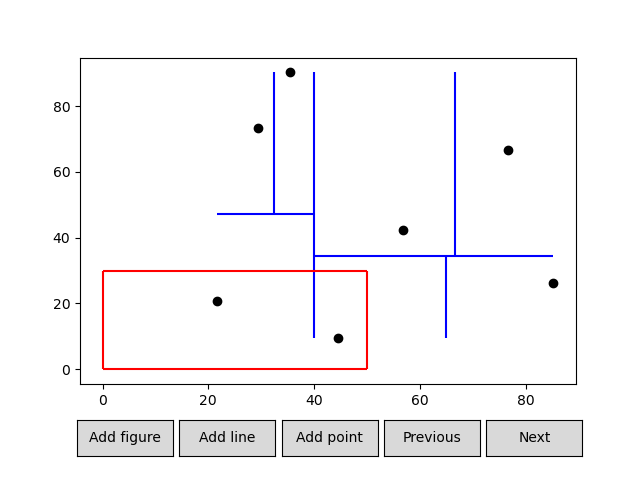

In [6]:
print(kd_tree.find_points_in_area(([np.float64(0), np.float64(0)], [np.float64(50), np.float64(30)])))
res_plot = kd_vis.get_searching_plot()
res_plot.draw()





## Quadtree visualization

<IPython.core.display.Javascript object>


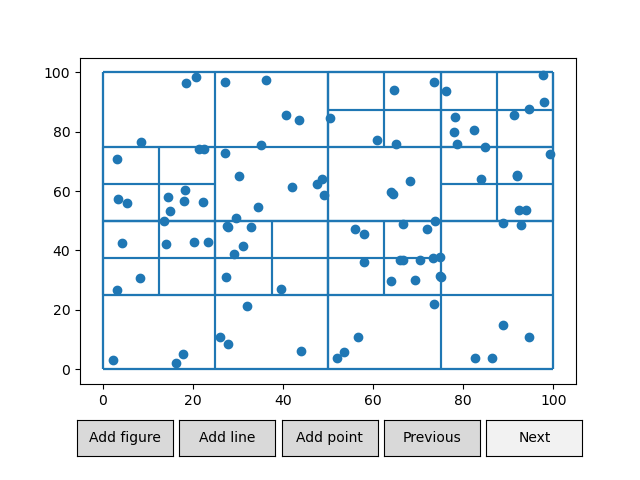

In [7]:
from quadtree import Quadtree
from random import uniform

A, B = (0, 0), (100, 100)
points = [(round(uniform(A[0], B[0]), 3), round(uniform(A[1], B[1]), 3)) for _ in range(150)]
quadtree = Quadtree(points, (A, B), 4, True)
boundary = ((2, 2), (90, 20))
quadtree.query_range(boundary)
plot = quadtree.visualizer.create_plot()
plot.draw()